### QUESTION
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

Q2. Load the Wine Quality dataset and explore its dimensions.

Q3. Check for null values, identify categorical variables, and encode them.

Q4. Separate the features and target variables from the dataframe.

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

Q6. Perform scaling on the dataset.

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

Q8. Create a Sequential model and add all the layers to it.

Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
     no improvement is observed.

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
     training.

Q12. Print the model summary.

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

Q14. Compile the model with the specified loss function, optimizer, and metrics.

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
     callbacks.

Q16. Get the model's parameters.

Q17. Store the model's training history as a Pandas DataFrame.

Q18. Plot the model's training history.

Q19. Evaluate the model's performance using the test data

In [115]:
!pip install tensorflow

In [116]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [117]:
print(tf.__version__)
import keras
print(keras.__version__)

2.13.0
2.13.1


In [118]:
wine_data = pd.read_csv("wine.csv",sep=',')

In [119]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [120]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [121]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [122]:
wine_data.shape

(1599, 12)

In [123]:
## checking for null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [124]:
# Identify categorical variables
categorical_variables = wine_data.select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['quality'], dtype='object')


In [125]:
print(wine_data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [126]:
## seprating features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality'] 

In [127]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [128]:
# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [129]:
y.head()

0     bad
1     bad
2     bad
3    good
4     bad
Name: quality, dtype: object

In [130]:
from sklearn.model_selection import train_test_split

##split data into train, test and validation 
X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp_encoded, test_size=0.5, random_state=42)


In [131]:
print(X_train.shape)
print(X_val.shape)
print(X_temp.shape)

(1119, 11)
(240, 11)
(480, 11)


In [132]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_temp_encoded.shape)

(1119,)
(240,)
(480,)


In [133]:
## scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_temp)

print(X_train_scaled.mean())
print(X_train_scaled.std())

-3.698181847954409e-15
1.0


In [134]:
from tensorflow.keras import layers

# define the model with input layer, two hidden layers and a output layer 
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  

    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'), 

    layers.Dense(1, activation='sigmoid') 
])


In [135]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

## implement tensorboard callback
tensorboard_callback = TensorBoard(log_dir="./logs")

##early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

##model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)


In [136]:
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                768       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
# fit the model with callbacks
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=50,  
    batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback]
)

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 0.7863 - accuracy: 0.5594 - val_loss: 0.6771 - val_accuracy: 0.6292
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6291 - val_loss: 0.6643 - val_accuracy: 0.6208
Epoch 3/50
 1/35 [..............................] - ETA: 0s - loss: 0.6993 - accuracy: 0.6250

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6175 - val_loss: 0.6851 - val_accuracy: 0.6208
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6247 - val_loss: 0.6515 - val_accuracy: 0.6333
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6238 - val_loss: 0.6405 - val_accuracy: 0.6292
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6291 - val_loss: 0.7032 - val_accuracy: 0.5708
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6282 - val_loss: 0.6540 - val_accuracy: 0.6167
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6192 - accuracy: 0.6461 - val_loss: 0.6336 - val_accuracy: 0.6375
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.6327 - val_loss: 0.6338 - val_accuracy: 0.6250
Epoch 10/50
35/35 [============

In [139]:
## get parameters
model.get_weights()

[array([[ 0.22948238,  0.03048196,  0.05656509,  0.09317293,  0.11326888,
         -0.2254811 , -0.2054083 ,  0.22239375,  0.02205726,  0.1218901 ,
          0.24595512,  0.14731877,  0.18873324,  0.2737839 , -0.21316907,
         -0.06246014, -0.11063083,  0.02737763, -0.14246628,  0.1988113 ,
         -0.03787228, -0.25277314,  0.09194039,  0.28938946, -0.18611956,
         -0.08237004, -0.2487441 , -0.16044986, -0.1607644 ,  0.1915124 ,
         -0.01021104, -0.16977173,  0.22189403, -0.2898157 , -0.15157384,
          0.05373261,  0.05849194, -0.16575933,  0.18045592,  0.24135438,
         -0.03598664, -0.11042254, -0.0032035 ,  0.12271207,  0.18083377,
         -0.14070499,  0.10284644,  0.20781234,  0.07544065, -0.12927233,
          0.25468594, -0.20093608, -0.22947636, -0.23330507, -0.08859527,
          0.15258944, -0.0866384 , -0.17700659,  0.19413567,  0.05566072,
          0.07276224, -0.1349513 ,  0.20396394, -0.03232157],
        [-0.10712562, -0.01083848,  0.2308864 , -0

In [140]:
## Convert the history dictionary to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

## Print the first few rows of the DataFrame
history_df.to_csv('training_history.csv', index=False)

In [141]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.786334,0.559428,0.677067,0.629167
1,0.658133,0.629133,0.664300,0.620833
2,0.660436,0.617516,0.685068,0.620833
3,0.647329,0.624665,0.651476,0.633333
4,0.626116,0.623771,0.640531,0.629167


In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

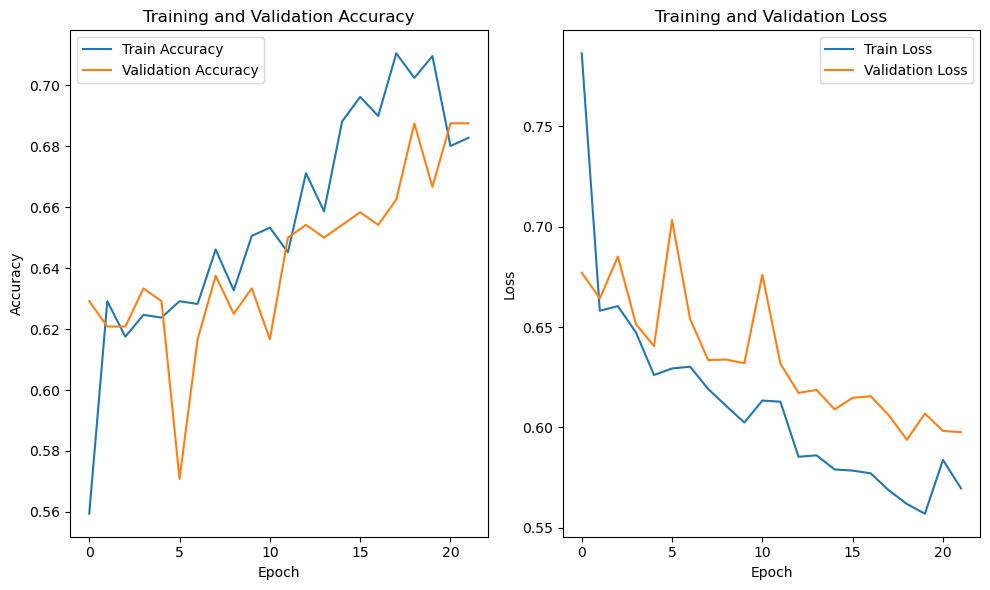

In [143]:
import matplotlib.pyplot as plt

## plot training and validation metrics
plt.figure(figsize=(10, 6))

## plot training accuracy and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## plot training loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [144]:
# Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_temp_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


15/15 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6562
Test Loss: 0.6126241087913513
Test Accuracy: 0.65625
